Data Description: 

MovieLens data sets were collected by the GroupLens Research Projectat the University of Minnesota.

Domain: 

Entertainment and Internet

Context:

The GroupLens Research Project is a research group in the Departmentof Computer Science and Engineering at the University of Minnesota.The data is widely used for collaborative filtering and other filtering solutions. However, we will beusing this data to act as a means to demonstrate our skill in using Python to “play”with data.

AttributeInformation:

* Download the zip file from  data source
* Extract the zip file and you will find a folder named   ml-100k
* Go through the README file that you will find in the folder from the above step where you will find the information about the attributes in the three datasets

Learning Outcomes: 

* Exploratory Data Analysis
* Visualization using Python
* Pandas

Objective:

Demonstrate your skill in python for data analysis.

Steps and tasks:

* You will need to import 3 files from the folder as data frames  into your Jupyter notebook

ou.data 
ou.item
ou.user

(You might encounter some trouble importing the data, you are expected to figure out on your own)

* Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames
* Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.
* Display the top 25 movies by average rating, as a list/series/dataframe.Note:-Consider only the movies which received atleast a 100 ratings
* Verify the following statements (no need of doing a statistical test. Compare absolute numbers):oMen watch more drama than womenoMen watch more Romance than womenoWomen watch more Sci-Fi than men

References:

* https://movielens.org/


Dataset link - https://grouplens.org/datasets/movielens/100k/ 

In [1]:
# Loading required libraries

import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('ml-100k/u.data', sep='\t', names=['user id','item id','rating','timestamp'])
data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
item = pd.read_csv('ml-100k/u.item', sep='|',encoding='latin-1',names=['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
user = pd.read_table('ml-100k/u.user',sep='|',names = ['user id','age','gender','occupation','zip code'])
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# data.to_csv('data.csv',header=True,index=False)
# data.to_csv('item.csv',header=True,index=False)
# data.to_csv('user.csv',header=True,index=False)

* Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames

#### UNIVARIATE PLOTS

#### RATING

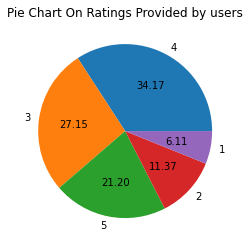

{4: 34174, 3: 27145, 5: 21201, 2: 11370, 1: 6110}

In [6]:
plt.pie(data['rating'].value_counts(),labels = data['rating'].value_counts().index,autopct = '%.2f')
plt.title('Pie Chart On Ratings Provided by users')
plt.show()

dict(zip(data['rating'].value_counts().index.tolist() , data['rating'].value_counts().values.tolist()))

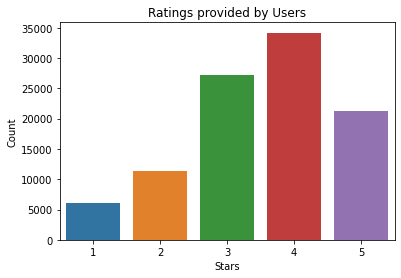

In [7]:
sns.barplot(x = data['rating'].value_counts().index, y = data['rating'].value_counts().values)
plt.title('Ratings provided by Users')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

In [8]:
data.isnull().sum()

user id      0
item id      0
rating       0
timestamp    0
dtype: int64

OBSERVATIONS FOR DATA.RATING

* 34.17% of movies are rated 4
* 27.15% of movies are rated 3
* 21.20% of movies are rated 5
* 11.37% of movies are rated 2
* 6.11% of movies are rated 1
* Most of the people give 4 ratings to movies comparatively
* There are no null values
* There are 5 unique values and they are 1,2,3,4,5


#### AGE

In [9]:
user['age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

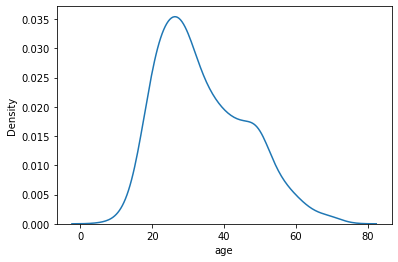

In [10]:
sns.kdeplot(user['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

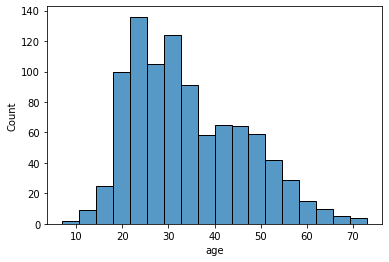

In [11]:
sns.histplot(data=user,x ='age')

In [12]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


(array([  8., 101., 197., 221., 123., 115., 111.,  36.,  23.,   8.]),
 array([ 7. , 13.6, 20.2, 26.8, 33.4, 40. , 46.6, 53.2, 59.8, 66.4, 73. ]),
 <BarContainer object of 10 artists>)

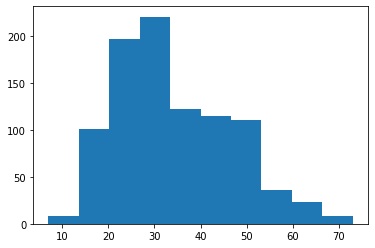

In [14]:
plt.hist(user.age)

In [15]:
age_rating_dict = dict(zip(user.age.value_counts().index,user.age.value_counts().values))

In [16]:
for k,v in age_rating_dict.items():
    if v >= 10:
        print(f'Age - {k}: movies count- {v}')


Age - 30: movies count- 39
Age - 25: movies count- 38
Age - 22: movies count- 37
Age - 28: movies count- 36
Age - 27: movies count- 35
Age - 26: movies count- 34
Age - 24: movies count- 33
Age - 29: movies count- 32
Age - 20: movies count- 32
Age - 23: movies count- 28
Age - 32: movies count- 28
Age - 35: movies count- 27
Age - 21: movies count- 27
Age - 33: movies count- 26
Age - 31: movies count- 25
Age - 19: movies count- 23
Age - 44: movies count- 23
Age - 39: movies count- 22
Age - 40: movies count- 21
Age - 36: movies count- 21
Age - 42: movies count- 21
Age - 48: movies count- 20
Age - 51: movies count- 20
Age - 50: movies count- 20
Age - 49: movies count- 19
Age - 37: movies count- 19
Age - 18: movies count- 18
Age - 38: movies count- 17
Age - 34: movies count- 17
Age - 45: movies count- 15
Age - 17: movies count- 14
Age - 47: movies count- 14
Age - 43: movies count- 13
Age - 53: movies count- 12
Age - 46: movies count- 12
Age - 55: movies count- 11
Age - 41: movies count- 10


OBSERVATIONS FOR USER.AGE

* There are no null values.
* Age is quantitative.
* Age is right skewed.
* Most users are between the age of 17 - 55.

#### RELEASE DATE

In [17]:
item['release date'] = pd.to_datetime(item['release date'])
# CONVERTING VARIABLE TO DATETIME FORMAT

In [18]:
item['release date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1682 entries, 0 to 1681
Series name: release date
Non-Null Count  Dtype         
--------------  -----         
1681 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.3 KB


In [19]:
item['year'] = pd.DatetimeIndex(item['release date']).year

In [20]:
item['year'].isnull().sum()

1

In [21]:
item[item['year'].isnull()]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
266,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [22]:
item.drop(266,inplace=True)

In [23]:
item['year'].isnull().sum()

0

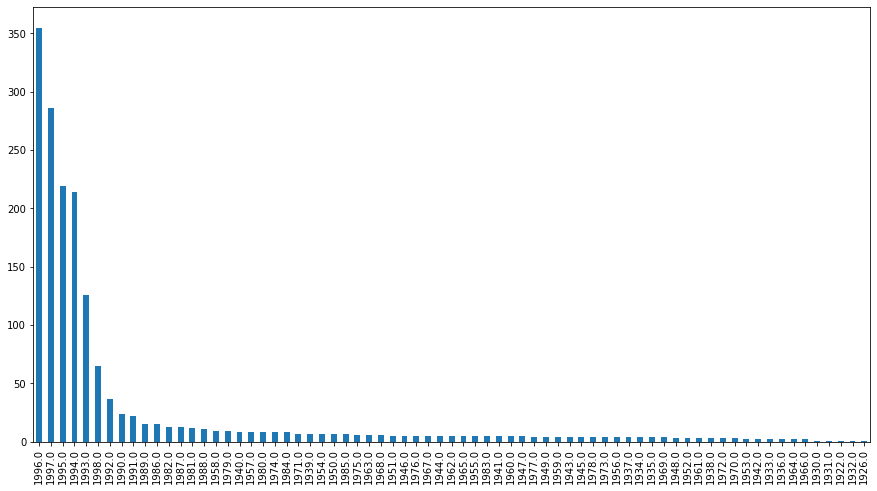

In [24]:
plt.figure(figsize=(15,8))
item['year'].value_counts().plot(kind='bar')
plt.show()

OBSERVATIONS FOR ITEM.Release date

* There is 1 null values(we removed the row as there was no information in it).
* Year is quantitative.
* Year is left skewed.
* Most of the movies are released in 1996(350+), 1997 (250+), 1995, 1994 (200+)

<AxesSubplot:xlabel='year', ylabel='Density'>

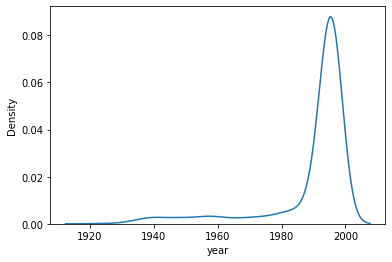

In [25]:
sns.kdeplot(item['year'])

#### VIDEO RELEASE DATE

In [26]:
item['video release date'].isnull().sum()

1681

In [27]:
item['video release date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1681 entries, 0 to 1681
Series name: video release date
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 26.3 KB


In [28]:
item.drop('video release date',axis = 1, inplace = True)

OBSERVATIONS FOR ITEM.video release date

* There is no non null values(we removed the column as there was no information in it).

#### GENDER

In [29]:
user.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

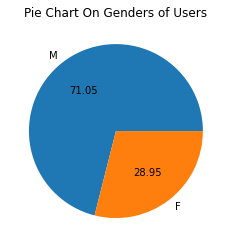

{'M': 34174, 'F': 27145}

In [30]:
plt.pie(user.gender.value_counts(),labels = user.gender.value_counts().index,autopct = '%.2f')
plt.title('Pie Chart On Genders of Users')
plt.show()

dict(zip(user.gender.value_counts().index.tolist() , data['rating'].value_counts().values.tolist()))

In [31]:
user.gender.info()

<class 'pandas.core.series.Series'>
RangeIndex: 943 entries, 0 to 942
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
943 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB


OBSERVATIONS FOR Genders

* There is no null values.
* Gender is categorical having the unique values as M representing Male and F representing Female.
* The ratio of Males are higher than the Female. 

#### OCCUPATION

In [32]:
user.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [33]:
user.occupation.nunique()

21

In [34]:
user.occupation.isnull().sum()

0

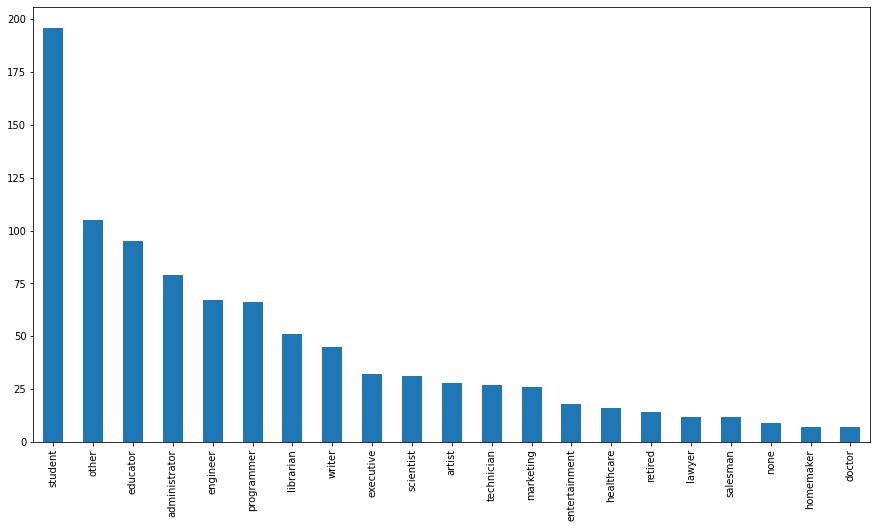

In [35]:
plt.figure(figsize=(15,8))
user.occupation.value_counts().plot(kind='bar')
plt.show()

OBSERVATIONS FOR ITEM.YEAR

* There are no null values.
* Occupation is categorical having 21 unique values.
* A lot of users are students having nearly 200.

* Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.

In [36]:
user.head(2)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [37]:
item.head(2)

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


In [38]:
data.head(2)

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [39]:
item.unknown.isnull().sum()

0

In [40]:
genre = item[['unknown',
       'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [41]:
genre_count = genre.sum()
genre_count

unknown          1
Action         251
Adventure      135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [42]:
item[item['unknown'] == 1]

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
1372,1373,Good Morning (1971),1971-02-04,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1971.0


In [43]:
item.drop(1372,axis = 0,inplace = True)

In [44]:
item[item['unknown'] == 1]

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year


In [45]:
item.drop('unknown',axis = 1,inplace = True) # Dropping unknown column from item

In [46]:
genre = item[['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [47]:
genre_count = genre.sum()
genre_count

Action         251
Adventure      135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [48]:
genre_count_dict = dict(zip(genre_count.index,genre_count.values))

In [49]:
# ax = sns.barplot(x='day', y='tip', data=groupedvalues)
# ax.bar_label(ax.containers[0])

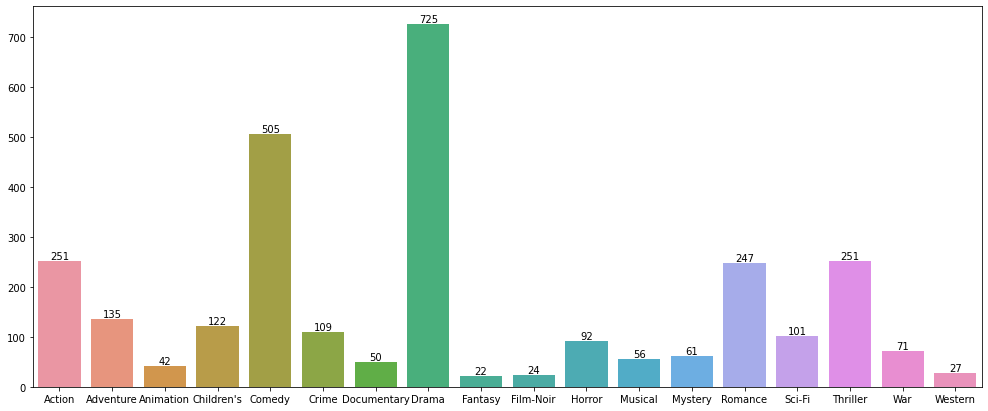

In [50]:
plt.figure(figsize=(17,7))
ax = sns.barplot(y = genre_count.values, x = genre_count.index)
ax.bar_label(ax.containers[0])
plt.show()

In [51]:
pd.concat([genre,item.year],axis=1).groupby('year').sum().T

year,1922.0,1926.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,...,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


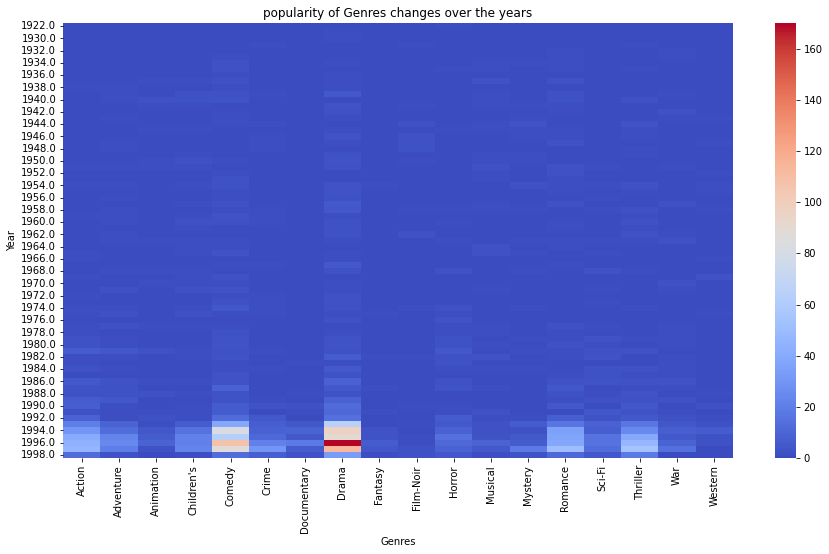

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.concat([genre,item.year],axis=1).groupby('year').sum(), cmap = 'coolwarm')
plt.title('popularity of Genres changes over the years')
plt.xlabel('Genres')
plt.ylabel('Year')
plt.show()

* Display the top 25 movies by average rating, as a list/series/dataframe.Note:-Consider only the movies which received atleast a 100 ratings

In [53]:
data.rename({'item id':'movie id'},inplace=True, axis=1)

In [54]:
#  df = pd.DataFrame({'a': ['a', 'b', 'a', 'a', 'b', 'c', 'd']})
#  after = df.groupby('a').size()
#  >> after
#  a
#  a    3
#  b    2
#  c    1
#  d    1
#  dtype: int64

#  >> after[after > 2]
#  a
#  a    3
#  dtype: int64

# https://stackoverflow.com/questions/31303417/python-pandas-dataframe-group-by-based-on-a-condition

In [55]:
results = data.groupby('movie id').size()
results[results > 100]

movie id
1       452
2       131
4       209
7       392
8       219
       ... 
926     101
928     104
1016    137
1028    148
1047    134
Length: 334, dtype: int64

In [56]:
ratings_with_more_than_100 = results[results > 100].index.to_list()
print(ratings_with_more_than_100)

[1, 2, 4, 7, 8, 9, 11, 12, 13, 14, 15, 22, 23, 24, 25, 28, 29, 31, 38, 42, 47, 48, 50, 53, 54, 55, 56, 58, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 79, 81, 82, 83, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 109, 111, 116, 117, 118, 121, 122, 123, 124, 125, 127, 129, 132, 133, 134, 135, 136, 137, 143, 144, 147, 148, 150, 151, 153, 154, 156, 157, 159, 161, 162, 164, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 245, 246, 248, 249, 250, 252, 255, 257, 258, 259, 260, 264, 265, 268, 269, 270, 271, 272, 273, 274, 275, 276, 281, 282, 283, 284, 285, 286, 288, 289, 291, 292, 293, 294, 298, 300, 301, 302, 303, 304, 307, 310, 313, 315, 316, 317, 318, 319, 321, 322, 323, 324, 325, 326, 327, 328, 33

In [57]:
ratings = data[data['movie id'].isin(ratings_with_more_than_100)].groupby('movie id').mean().sort_values(ascending=False,by = 'rating')
ratings

,user id,rating,timestamp
movie id,,,
408,443.142857,4.491071,8.823304e+08
318,469.714765,4.466443,8.834050e+08
169,454.483051,4.466102,8.828888e+08
483,471.831276,4.456790,8.834745e+08
64,441.187279,4.445230,8.826119e+08
...,...,...,...
358,496.097902,2.615385,8.836746e+08
260,462.204724,2.574803,8.842682e+08
325,443.171875,2.546875,8.831109e+08


In [58]:
ratings['movie id'] = ratings.index

In [64]:
ratings

,user id,rating,timestamp,movie id
movie id,,,,
408,443.142857,4.491071,8.823304e+08,408
318,469.714765,4.466443,8.834050e+08,318
169,454.483051,4.466102,8.828888e+08,169
483,471.831276,4.456790,8.834745e+08,483
64,441.187279,4.445230,8.826119e+08,64
...,...,...,...,...
358,496.097902,2.615385,8.836746e+08,358
260,462.204724,2.574803,8.842682e+08,260
325,443.171875,2.546875,8.831109e+08,325


In [66]:
pd.merge(item[['movie id', 'movie title']],ratings['rating'].iloc[:25], on = 'movie id',how = 'right')

,movie id,movie title,rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


Verify the following statements (no need of doing a statistical test. Compare absolute numbers):

* Men watch more drama than women
* Men watch more Romance than women
* Women watch more Sci-Fi than men

In [90]:
new_data = pd.merge(data, item, on = 'movie id')
new_data = pd.merge(new_data, user, on = 'user id')


In [116]:
group_by_genre = new_data.groupby('gender').sum().loc[:,'Action':'Western']
group_by_genre

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_21640/668880589.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_genre = new_data.groupby('gender').sum().loc[:,'Action':'Western']


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [120]:
group_by_genre['total'] = group_by_genre.sum(axis=1)
group_by_genre

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701.0
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884.0


In [121]:
(group_by_genre['Drama'] * 100)/ group_by_genre['total']

gender
F    20.498687
M    18.181189
dtype: float64

In [122]:
(group_by_genre['Romance'] * 100)/ group_by_genre['total']

gender
F    10.908549
M     8.561592
dtype: float64

In [123]:
(group_by_genre['Sci-Fi'] * 100)/ group_by_genre['total']

gender
F    4.895626
M    6.357468
dtype: float64

###### OBSERVATIONS
 
* Men watch more drama than women --> False
* Men watch more Romance than women -> False
* Women watch more Sci-Fi than men -> False